In [6]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
! kaggle datasets download paultimothymooney/breast-histopathology-images

100% 3.09G/3.10G [01:40<00:00, 59.0MB/s]
100% 3.10G/3.10G [01:40<00:00, 33.0MB/s]


In [8]:
! unzip /content/breast-histopathology-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2301_class0.png  
  inflating: IDC_regular_

Breast cancer occurs when some breast cells begin to grow abnormally. These cells divide more rapidly than healthy cells and continue to gather, forming a lump or mass. The cells may spread (metastasize) to the lymph nodes or other parts of the body. Breast cancer mostly begins with cells in the milk-producing ducts (invasive ductal carcinoma) or in the glandular tissue called lobules (invasive lobular carcinoma) or in other cells or tissue within the breast.

Researchers have identified hormonal, lifestyle and environmental factors that may increase the risk of breast cancer. But it is unclear why some women who have no risk factors develop cancer, yet others with risk factors never do. It is likely that breast cancer is caused by a complex interaction of genetic makeup and environment factors.

Studies say that over 1,70,000 new breast cancer cases are likely to develop in India by 2020. According to research, 1 in every 28 women is likely to get affected by the disease. While breast cancer occurs almost entirely in women, around 1-2% men are likely to get affected, too.

**Our Goal is to predict wheather a patch of a tissue slice of a given patient contains IDC or not**

In [9]:
# Importing necesarry files
import os
import numpy as np
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


from skimage.filters import gaussian
from skimage.util import random_noise
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split



import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D,Dropout,MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

# Obtaining and Adjusting the data

In [10]:
input_dir = os.listdir("./IDC_regular_ps50_idx5") 
collected_rays_dir = "collected_rays_dir"  # is this path  where all the images will be outputted
input_dir_str = "./IDC_regular_ps50_idx5/"

In [11]:
# Structure of Data
print(input_dir)
print(len(input_dir)) 

['12897', '10279', '12626', '12749', '9254', '9347', '8918', '10305', '15839', '14305', '10300', '15512', '15472', '12894', '10301', '12932', '13019', '14081', '16554', '12880', '10277', '9225', '12891', '12875', '8959', '13916', '12242', '12818', '10307', '10256', '14209', '13591', '12895', '10295', '16533', '14156', '12879', '9261', '13616', '12884', '12750', '12820', '9228', '10269', '12908', '10259', '10299', '9345', '12893', '9174', '9260', '12877', '15840', '13022', '13693', '16165', '12870', '8867', '10262', '15633', '14304', '9043', '9135', '12878', '10291', '9175', '9346', '9291', '12947', '16014', '9320', '10285', '14188', '15510', '13688', '12867', '12910', '8950', '9323', '12900', '14211', '9023', '14189', '10273', '12890', '12906', '12817', '9265', '9267', '10272', '12876', '13460', '15473', '9029', '10253', '8917', '8914', '12868', '12810', '8864', '9257', '16166', '13018', '9126', '16896', '15514', '12872', '12886', '8913', '12241', '9173', '10258', '8984', '13689', '102

There are 279 files in which, each patient named with their id, and each file contains x-ray images of its owner.

we will collect all the images in one place, while retaining ownership of each image and its class as well...

In [12]:
os.mkdir(collected_rays_dir)

In [13]:
all_rays_dir_lst = os.listdir('./collected_rays_dir') 

In [14]:
#Here we will move the images, but by adding a small part in their path, which indicates that they are negative or positive
for patient in input_dir:   
    path_0 = input_dir_str + str(patient) + '/0'
    path_1 = input_dir_str + str(patient) + '/1'
    file_list_0 = os.listdir(path_0)   
    file_list_1 = os.listdir(path_1)
    for fname in file_list_0:
            src = os.path.join(path_0, fname)
            dst = os.path.join(collected_rays_dir, fname)
            shutil.copyfile(src, dst)
    for fname in file_list_1:
        src = os.path.join(path_1, fname)
        dst = os.path.join(collected_rays_dir, fname)
        shutil.copyfile(src, dst)

In [15]:
all_rays_dir_lst = os.listdir('./collected_rays_dir') 
len(all_rays_dir_lst)

277524

There are whooping Two lakh seventy seven thousand five hundred and twenty four samples.

In [16]:
# created a Dataframe for images
data = pd.DataFrame(all_rays_dir_lst, columns=['image_id'])
data.head()

image_id
0     13616_idx5_x2201_y1_class0.png
1   15472_idx5_x2651_y151_class0.png
2    14305_idx5_x351_y601_class0.png
3  13693_idx5_x2351_y1651_class0.png
4   9041_idx5_x1701_y1301_class0.png

In [17]:
#Based on the addition that we added earlier in the path, we divide the data
def extract_target(x):
    a = x.split('_')
    b = a[4] #image name
    target = b[5] #getting the class
    return target

data['target'] = data['image_id'].apply(extract_target)

data.head(10)

image_id target
0     13616_idx5_x2201_y1_class0.png      0
1   15472_idx5_x2651_y151_class0.png      0
2    14305_idx5_x351_y601_class0.png      0
3  13693_idx5_x2351_y1651_class0.png      0
4   9041_idx5_x1701_y1301_class0.png      0
5    8975_idx5_x801_y1851_class0.png      0
6   9324_idx5_x1551_y1201_class0.png      0
7    13403_idx5_x651_y501_class0.png      0
8   12878_idx5_x601_y1751_class0.png      0
9   10290_idx5_x601_y1501_class0.png      0

In [18]:
# extracting patient id
def extract_patient_id(x):
    # split into a list
    a = x.split('_')
    patient_id = a[0]
    
    return patient_id
data['patient_id'] = data['image_id'].apply(extract_patient_id)
data.head()

image_id target patient_id
0     13616_idx5_x2201_y1_class0.png      0      13616
1   15472_idx5_x2651_y151_class0.png      0      15472
2    14305_idx5_x351_y601_class0.png      0      14305
3  13693_idx5_x2351_y1651_class0.png      0      13693
4   9041_idx5_x1701_y1301_class0.png      0       9041

In [19]:
data['target'].value_counts()

0    198738
1     78786
Name: target, dtype: int64

It  seems that the number of healthy samples are greater than the number of infected samples.


# Exploratory Data Analysis
**Healthy** **patches**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


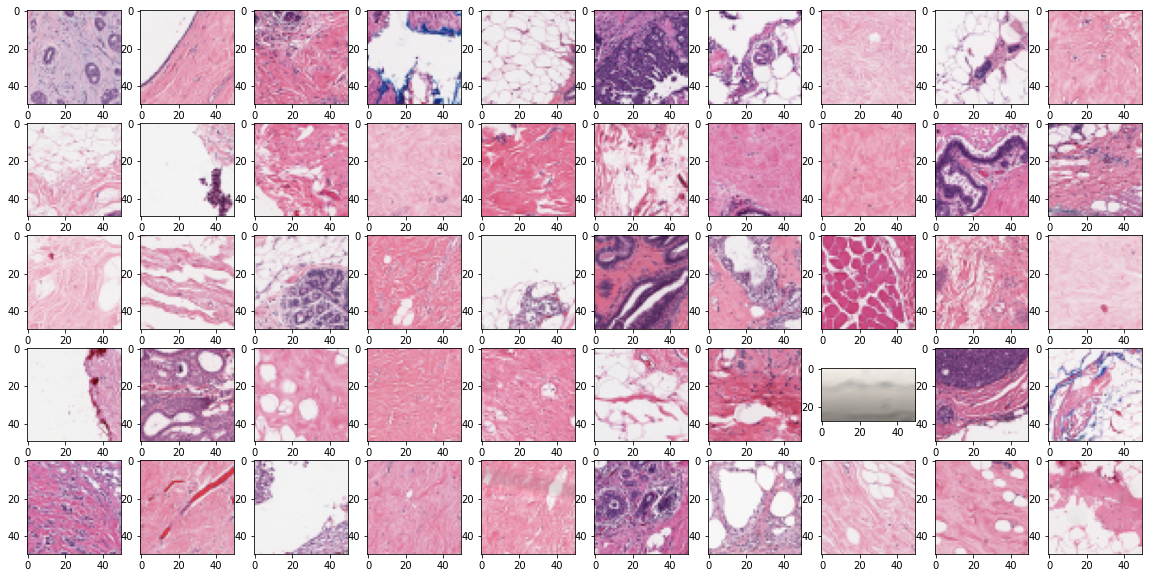

In [20]:
data.target = data.target.astype(np.int)
fig, ax = plt.subplots(5,10,figsize=(20,10))
pos_selection = np.random.choice(data[data.target ==1].index, size=50, replace=False,)
neg_selection = np.random.choice(data[data.target ==0].index, size=50, replace=False,)
for n in range(5):
    for m in range(10):
        idx = neg_selection[m + 10*n]
        path =os.path.join(collected_rays_dir,data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

Most of the mammograms are light pink, but there are also some dark ones purple like colors


---
# Cancer patches

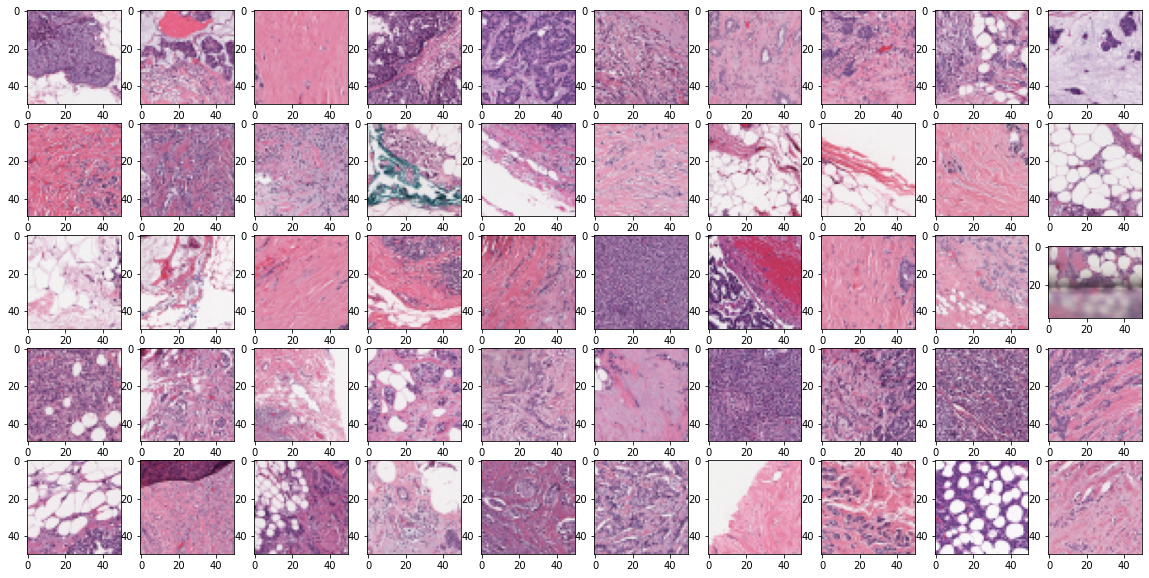

In [21]:
fig, ax = plt.subplots(5,10,figsize=(20,10))
for n in range(5):
    for m in range(10):
        idx = pos_selection[m + 10*n]
        path =os.path.join(collected_rays_dir,data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

*   Patches with cancer look more violet and crowded than healthy ones.
* In fact, we could not determine the actual difference between the two types with the naked eye, but I think that the model is able to detect hidden patterns in these images that enable us to determine the state of each image. 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


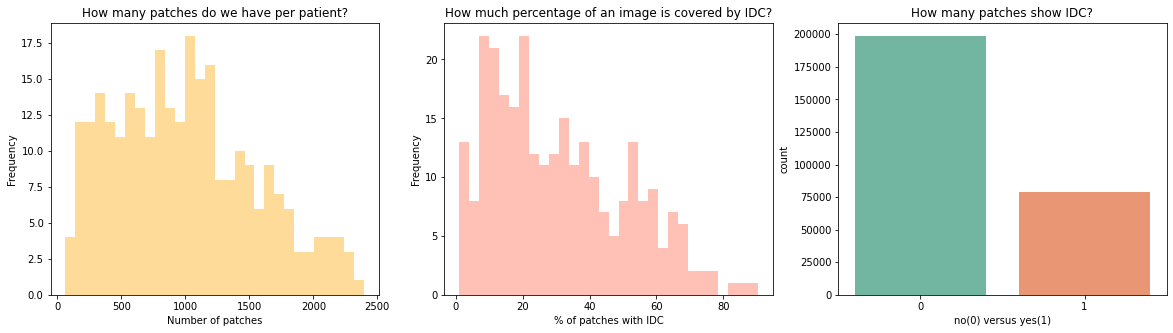

In [22]:
cancer_perc = data.groupby("patient_id").target.value_counts()/ data.groupby("patient_id").target.size()
cancer_perc = cancer_perc.unstack()

fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(data.groupby("patient_id").size(), ax=ax[0], color="Orange", kde=False, bins=30)
ax[0].set_xlabel("Number of patches")
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many patches do we have per patient?");
sns.distplot(cancer_perc.loc[:, 1]*100, ax=ax[1], color="Tomato", kde=False, bins=30)
ax[1].set_title("How much percentage of an image is covered by IDC?")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("% of patches with IDC");
sns.countplot(data.target, palette="Set2", ax=ax[2]);
ax[2].set_xlabel("no(0) versus yes(1)")
ax[2].set_title("How many patches show IDC?");

Insights:
The number of image patches per patient varies a lot
Most of the photos have a percentage that is not large, but there are other photos that have a percentage of up to 80%
the smaller number of mammograms had cancer

In [23]:
def extract_coords(df):
    coord = df.path.str.rsplit("_", n=4, expand=True)
    coord = coord.drop([0, 1, 4], axis=1)
    coord = coord.rename({2: "x", 3: "y"}, axis=1)
    coord.loc[:, "x"] = coord.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    coord.loc[:, "y"] = coord.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    df.loc[:, "x"] = coord.x.values
    df.loc[:, "y"] = coord.y.values
    return df

def get_cancer_dataframe(patient_id, cancer_id):
    path = input_dir_str + patient_id + "/" + cancer_id
    files = os.listdir(path)
    dataframe = pd.DataFrame(files, columns=["filename"])
    path_names = path + "/" + dataframe.filename.values
    dataframe = dataframe.filename.str.rsplit("_", n=4, expand=True)
    dataframe.loc[:, "target"] = np.int(cancer_id)
    dataframe.loc[:, "path"] = path_names
    dataframe = dataframe.drop([0, 1, 4], axis=1)
    dataframe = dataframe.rename({2: "x", 3: "y"}, axis=1)
    dataframe.loc[:, "x"] = dataframe.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    dataframe.loc[:, "y"] = dataframe.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    return dataframe
def get_patient_dataframe(patient_id):
    df_0 = get_cancer_dataframe(patient_id, "0")
    df_1 = get_cancer_dataframe(patient_id, "1")
    patient_df = df_0.append(df_1)
    return patient_df

In [24]:
example = get_patient_dataframe(data.patient_id.values[0])
example.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

x     y  target                                               path
0  2201     1       0  ./IDC_regular_ps50_idx5/13616/0/13616_idx5_x22...
1  2001  1751       0  ./IDC_regular_ps50_idx5/13616/0/13616_idx5_x20...
2  2301  2651       0  ./IDC_regular_ps50_idx5/13616/0/13616_idx5_x23...
3   301  1551       0  ./IDC_regular_ps50_idx5/13616/0/13616_idx5_x30...
4  1701   101       0  ./IDC_regular_ps50_idx5/13616/0/13616_idx5_x17...

**Well let's take a closer look at the shape of the patches and their distribution in each mammogram using Binary objective visualization for each tissue slice:**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

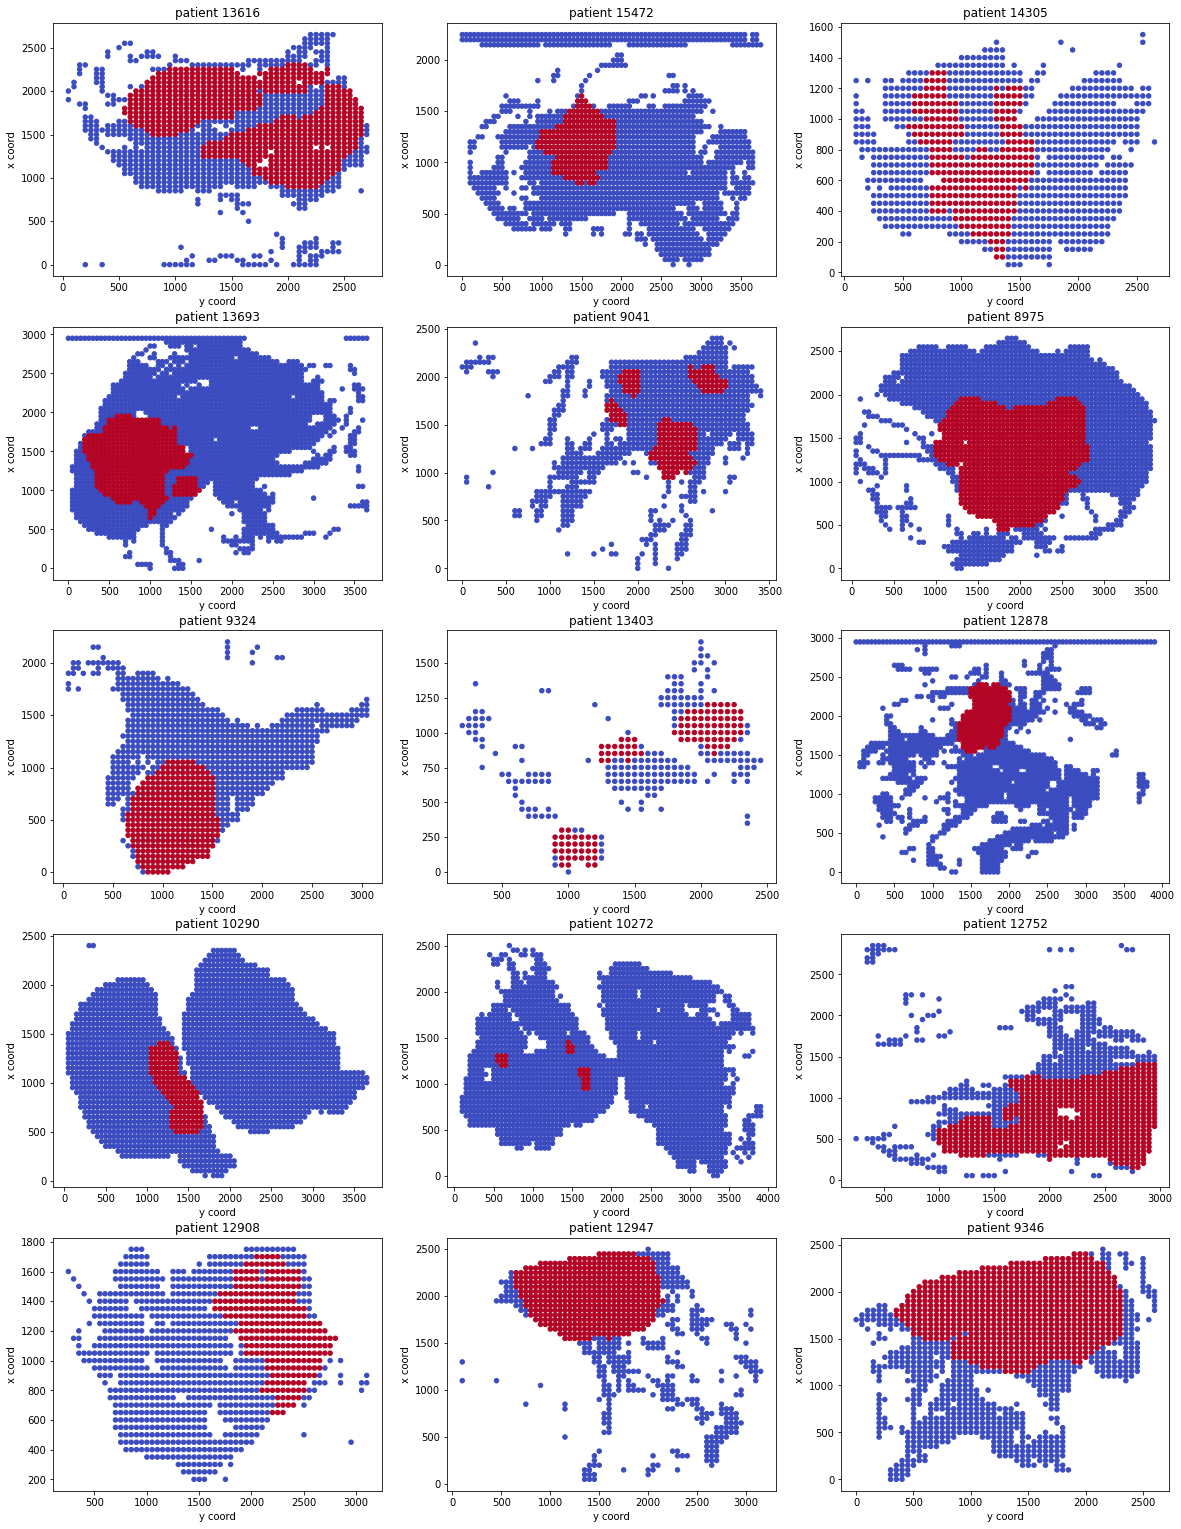

In [25]:
fig, ax = plt.subplots(5,3,figsize=(20, 27))

patient_ids = data.patient_id.unique()

for n in range(5):
    for m in range(3):
        patient_id = patient_ids[m + 3*n]
        example_df = get_patient_dataframe(patient_id)
        
        ax[n,m].scatter(example_df.x.values, example_df.y.values, c=example_df.target.values, cmap="coolwarm", s=20);
        ax[n,m].set_title("patient " + patient_id)
        ax[n,m].set_xlabel("y coord")
        ax[n,m].set_ylabel("x coord")

* We see a large variation in the concentration of cells
* Sometimes we don't have the full tissue information. It seems that tissue patches have been discarded or lost during preparation.

---

Image Processing

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


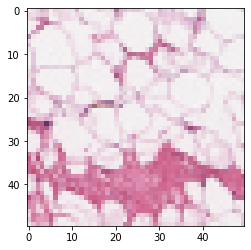

In [26]:
data.target = data.target.astype(np.int)
random_image_path = np.random.choice(data[data.target ==0].index, size=1, replace=False,)
path =os.path.join(collected_rays_dir,data.loc[random_image_path[0], 'image_id'])
image = mpimg.imread(path)
plt.imshow(image)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  """Entry point for launching an IPython kernel.


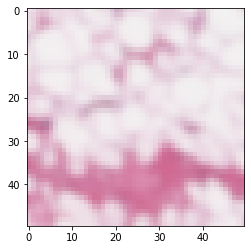

In [27]:
gaussian_image = gaussian(image)
plt.imshow(gaussian_image)

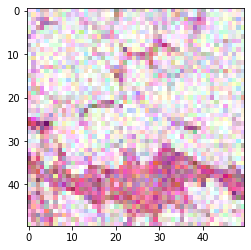

In [28]:
noise_image = random_noise(image)
plt.imshow(noise_image)

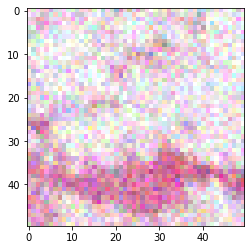

In [29]:
noise_gaussian_image = random_noise(gaussian_image)
plt.imshow(noise_gaussian_image)

In [30]:
os.mkdir('image_processing') #We create a new file to process the data in
os.mkdir('image_processing/noise_images')

In [31]:
#Here we take the image from the normal images folder, process it by putting some random noise, and then save it in the new file
for normal_image in all_rays_dir_lst :
    path        = collected_rays_dir+'/'+ normal_image
    img         = mpimg.imread( path ,0)
    noise_image = random_noise(img)
    fname       = normal_image
    new_path    = os.path.join('image_processing/noise_images',fname)
    mpimg.imsave(new_path, noise_image)

In [32]:
os.mkdir( 'image_processing/processd_data_train')
os.mkdir( 'image_processing/processd_data_test')
os.mkdir( 'image_processing/processd_data_train/zeros')
os.mkdir( 'image_processing/processd_data_train/ones')
os.mkdir( 'image_processing/processd_data_test/zeros')
os.mkdir( 'image_processing/processd_data_test/ones')

In [33]:
processd_lst = os.listdir('image_processing/noise_images')
processd_lst_str = 'image_processing/noise_images'
processd_data = pd.DataFrame(processd_lst, columns=['image_id'])
processd_data.head()

image_id
0     13616_idx5_x2201_y1_class0.png
1   15472_idx5_x2651_y151_class0.png
2    14305_idx5_x351_y601_class0.png
3  13693_idx5_x2351_y1651_class0.png
4   9041_idx5_x1701_y1301_class0.png

In [34]:
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

processd_data['target'] = processd_data['image_id'].apply(extract_target)

processd_data.head(10)

image_id target
0     13616_idx5_x2201_y1_class0.png      0
1   15472_idx5_x2651_y151_class0.png      0
2    14305_idx5_x351_y601_class0.png      0
3  13693_idx5_x2351_y1651_class0.png      0
4   9041_idx5_x1701_y1301_class0.png      0
5    8975_idx5_x801_y1851_class0.png      0
6   9324_idx5_x1551_y1201_class0.png      0
7    13403_idx5_x651_y501_class0.png      0
8   12878_idx5_x601_y1751_class0.png      0
9   10290_idx5_x601_y1501_class0.png      0

In [35]:
processd_data['target'].value_counts()

0    198738
1     78786
Name: target, dtype: int64

In [36]:
y = processd_data['target']
processd_train, processd_test = train_test_split(processd_data, test_size=0.10, random_state=101, stratify=y)
processd_test_pls =processd_test.image_id
processd_train_pls =processd_train.image_id

In [37]:
processd_data.set_index('image_id', inplace=True)
for image in processd_test_pls:
    fname = image
    target = processd_data.loc[image,'target']
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(processd_lst_str, fname)
    dst = os.path.join("image_processing/processd_data_test", label, fname)
    shutil.copyfile(src, dst)

In [38]:
for image in processd_train_pls:
    fname  = image
    target = processd_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(processd_lst_str, fname)
    dst = os.path.join('image_processing/processd_data_train', label, fname)
    shutil.copyfile(src, dst)

In [39]:
print(len(os.listdir('image_processing/processd_data_train/zeros')))
print(len(os.listdir('image_processing/processd_data_train/ones')))
print(len(os.listdir('image_processing/processd_data_test/zeros')))
print(len(os.listdir('image_processing/processd_data_test/ones')))

178864
70907
19874
7879


Processing and Normal test
the images we processed and the noraml are tested on the same model to see which the best in the accuracy
A small sample is taken for testing (20,000) images

First: the processed images

In [40]:
processd_lst = os.listdir('image_processing/noise_images')
processd_lst_str = 'image_processing/noise_images'
processd_data = pd.DataFrame(processd_lst, columns=['image_id'])
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

processd_data['target'] = processd_data['image_id'].apply(extract_target)

processd_data.head(10)

image_id target
0     13616_idx5_x2201_y1_class0.png      0
1   15472_idx5_x2651_y151_class0.png      0
2    14305_idx5_x351_y601_class0.png      0
3  13693_idx5_x2351_y1651_class0.png      0
4   9041_idx5_x1701_y1301_class0.png      0
5    8975_idx5_x801_y1851_class0.png      0
6   9324_idx5_x1551_y1201_class0.png      0
7    13403_idx5_x651_y501_class0.png      0
8   12878_idx5_x601_y1751_class0.png      0
9   10290_idx5_x601_y1501_class0.png      0

In [41]:
os.mkdir( 'image_processing/model_tst')
os.mkdir( 'image_processing/model_tst/trainig')
os.mkdir( 'image_processing/model_tst/testing')          
os.mkdir( 'image_processing/model_tst/trainig/zeros')
os.mkdir( 'image_processing/model_tst/trainig/ones')
os.mkdir( 'image_processing/model_tst/testing/zeros')
os.mkdir( 'image_processing/model_tst/testing/ones')

In [42]:
df_0 = processd_data[processd_data['target'] == '0'].sample(10000, random_state=101)
df_1 = processd_data[processd_data['target'] == '1'].sample(10000, random_state=101)
test_data =pd.DataFrame(data)
test_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
test_y = test_data['target']
test_data_train, test_data_test = train_test_split(test_data, test_size=0.10, random_state=101, stratify=test_y)
sts_train = test_data_train.image_id
tst_test  = test_data_test.image_id
test_data.set_index('image_id', inplace=True)
for image in sts_train:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(collected_rays_dir, fname)
    dst = os.path.join('image_processing/model_tst/trainig', label, fname)
    shutil.copyfile(src, dst)
for image in tst_test:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(collected_rays_dir, fname)
    dst = os.path.join('image_processing/model_tst/testing', label, fname)
    shutil.copyfile(src, dst)    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


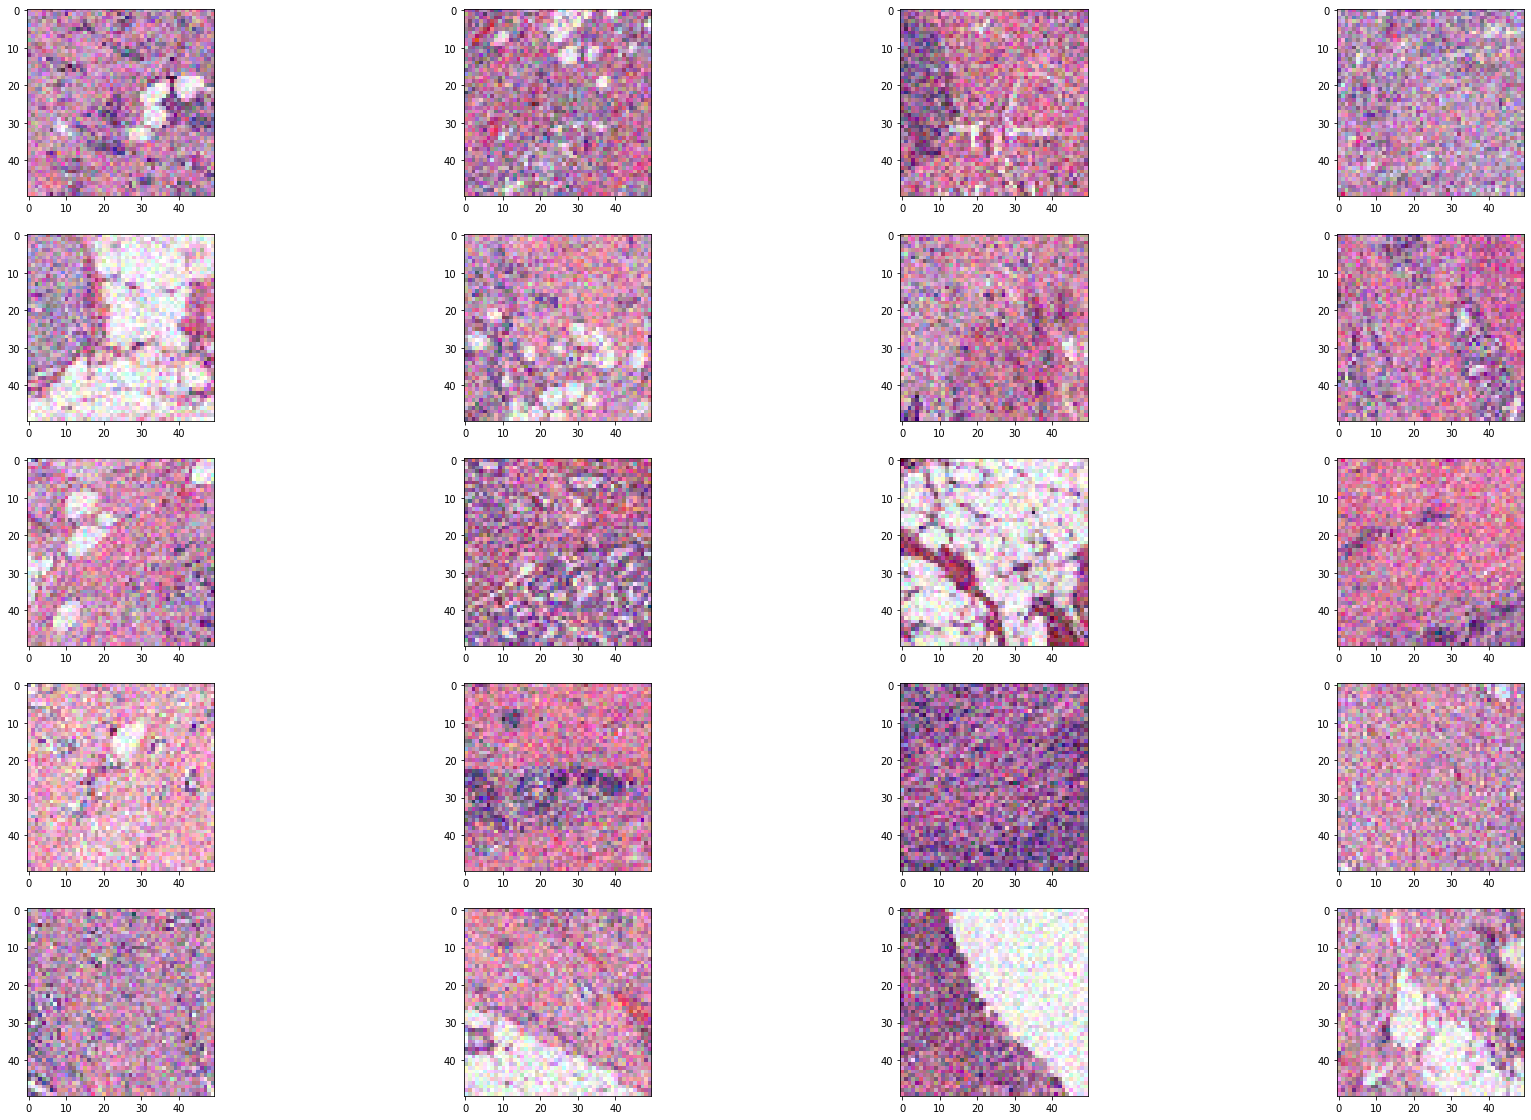

In [43]:
processd_data.target = processd_data.target.astype(np.int)
fig, ax = plt.subplots(5,4,figsize=(30,20))
pos_selection = np.random.choice(processd_data[processd_data.target==1].index.values, size=20, replace=False)
neg_selection = np.random.choice(processd_data[processd_data.target==0].index.values, size=20, replace=False)
for n in range(5):
    for m in range(4):
        idx = pos_selection[m + 4*n]
        path =os.path.join(processd_lst_str,processd_data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

Here we show pictures of some of the processed carcinogenic images

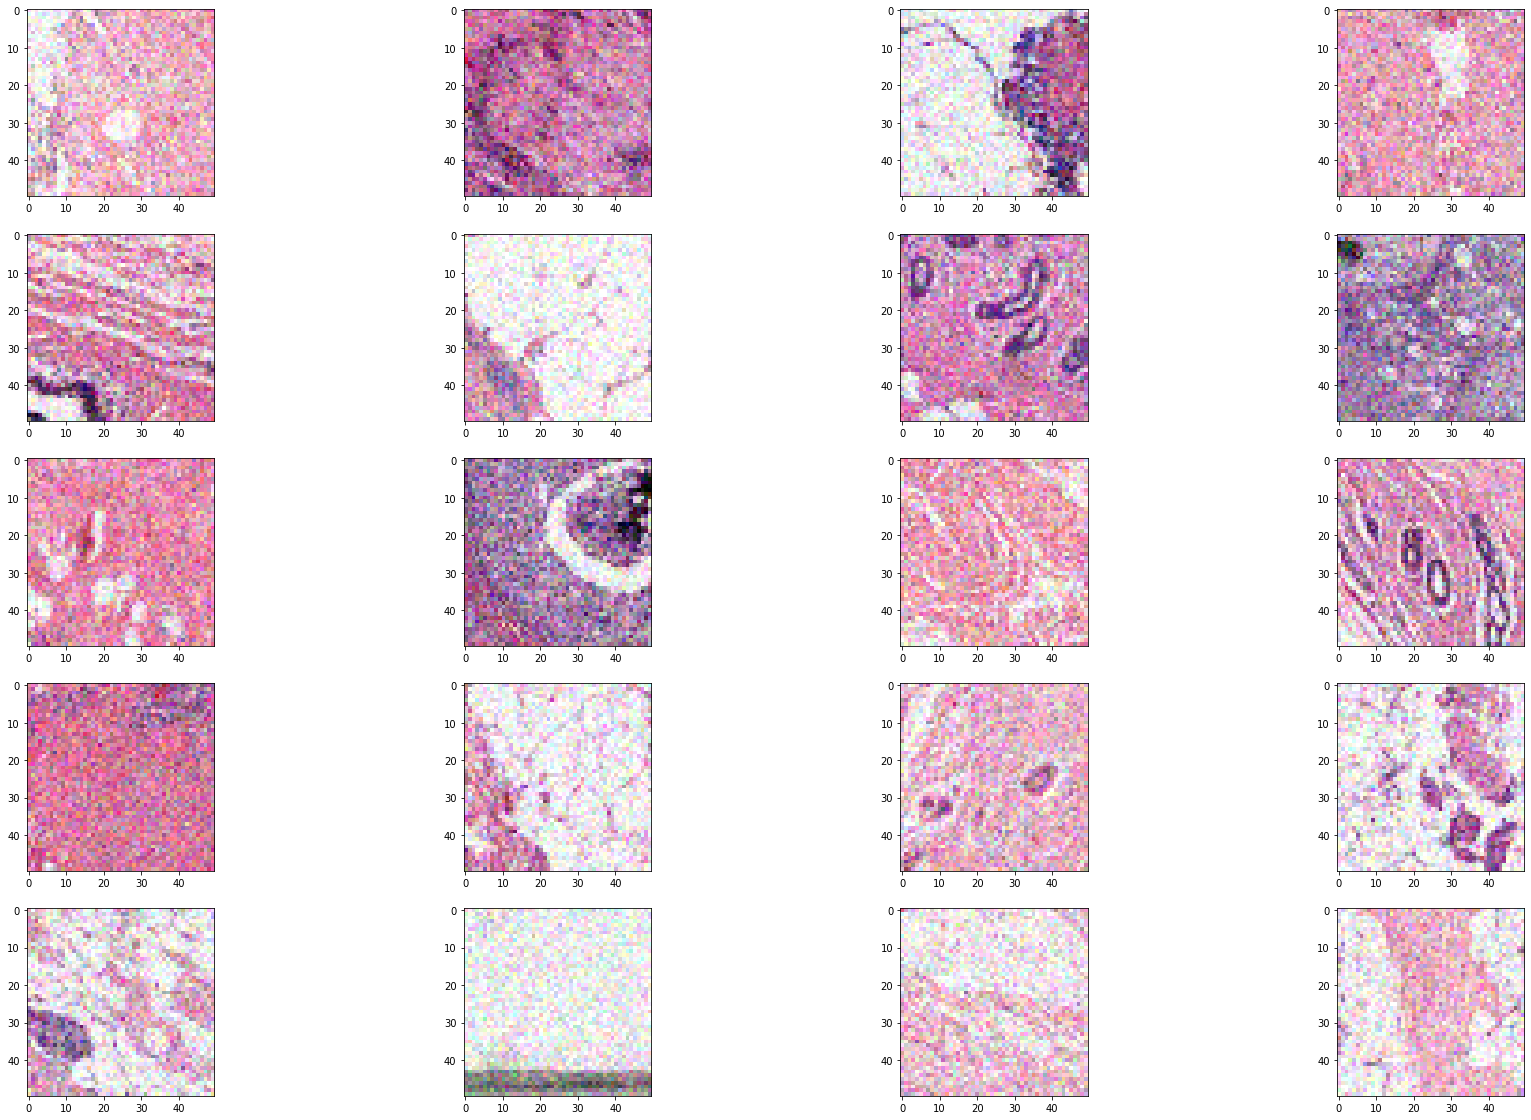

In [44]:
fig, ax = plt.subplots(5,4,figsize=(30,20))
for n in range(5):
    for m in range(4):
        idx = neg_selection[m + 4*n]
        path =os.path.join(processd_lst_str,processd_data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

Here we show pictures of some of the normal images that have been processed

In [45]:
data_processd_test_generation = ImageDataGenerator(rescale=1.0/255)
train_generation_processd = data_processd_test_generation.flow_from_directory("image_processing/model_tst/trainig", target_size=(50,50), batch_size=10,class_mode='categorical')
test_generation_processd = data_processd_test_generation.flow_from_directory("image_processing/model_tst/testing",target_size=(50,50),batch_size=10,class_mode='categorical')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [46]:
my_model_im_processd =Sequential()
my_model_im_processd.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
my_model_im_processd.add(MaxPool2D(pool_size=(2,2)))


my_model_im_processd.add(Flatten())

my_model_im_processd.add(Dense(128,activation='relu'))

my_model_im_processd.add(Dense(2,activation='softmax'))

my_model_im_processd.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [47]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
my_model_im_processd.fit_generator(train_generation_processd,validation_data=test_generation_processd,epochs=60, verbose=1,callbacks=early_stop)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/60
1800/1800 [==============================] - 28s 11ms/step - loss: 0.5496 - accuracy: 0.7305 - val_loss: 0.5607 - val_accuracy: 0.7650
Epoch 2/60
1800/1800 [==============================] - 19s 10ms/step - loss: 0.5067 - accuracy: 0.7678 - val_loss: 0.4732 - val_accuracy: 0.7825
Epoch 3/60
1800/1800 [==============================] - 19s 10ms/step - loss: 0.4891 - accuracy: 0.7774 - val_loss: 0.4275 - val_accuracy: 0.8085
Epoch 4/60
1800/1800 [==============================] - 19s 10ms/step - loss: 0.4677 - accuracy: 0.7887 - val_loss: 0.4456 - val_accuracy: 0.7945
Epoch 5/60
1800/1800 [==============================] - 19s 10ms/step - loss: 0.4534 - accuracy: 0.7972 - val_loss: 0.5286 - val_accuracy: 0.7740


In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Second: the normal images

In [49]:
os.mkdir( 'image_processing/normal')
os.mkdir( 'image_processing/normal/model_tst') 
os.mkdir( 'image_processing/normal/model_tst/trainig')
os.mkdir( 'image_processing/normal/model_tst/testing')
os.mkdir( 'image_processing/normal/model_tst/trainig/zeros')
os.mkdir( 'image_processing/normal/model_tst/trainig/ones')
os.mkdir( 'image_processing/normal/model_tst/testing/zeros')
os.mkdir( 'image_processing/normal/model_tst/testing/ones')

In [50]:
data = pd.DataFrame(all_rays_dir_lst, columns=['image_id'])
data['target'] = data['image_id'].apply(extract_target)
df_0 = data[data['target'] == '0'].sample(10000, random_state=101)
df_1 = data[data['target'] == '1'].sample(10000, random_state=101)
test_data =pd.DataFrame(data)
test_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
test_y = test_data['target']
test_data_train, test_data_test = train_test_split(test_data, test_size=0.10, random_state=101, stratify=test_y)
sts_train = test_data_train.image_id
tst_test  = test_data_test.image_id
test_data.set_index('image_id', inplace=True)
for image in sts_train:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(collected_rays_dir, fname)
    dst = os.path.join('image_processing/normal/model_tst/trainig', label, fname)
    shutil.copyfile(src, dst)
for image in tst_test:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(collected_rays_dir, fname)
    dst = os.path.join('image_processing/normal/model_tst/testing', label, fname)
    shutil.copyfile(src, dst)

In [51]:
data_normal_test_generation = ImageDataGenerator(rescale=1.0/255)
train_generation_normal = data_normal_test_generation.flow_from_directory("image_processing/normal/model_tst/trainig", target_size=(50,50), batch_size=10,class_mode='categorical')
test_generation_normal = data_normal_test_generation.flow_from_directory("image_processing/normal/model_tst/testing",target_size=(50,50),batch_size=10,class_mode='categorical')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [52]:
my_model_im_norm =Sequential()
my_model_im_norm.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
my_model_im_norm.add(MaxPool2D(pool_size=(2,2)))


my_model_im_norm.add(Flatten())

my_model_im_norm.add(Dense(128,activation='relu'))
my_model_im_norm.add(Dense(2,activation='softmax'))

my_model_im_norm.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [53]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
my_model_im_processd.fit_generator(train_generation_normal,validation_data=test_generation_normal,epochs=60, verbose=1,callbacks=early_stop)

Epoch 1/60
   6/1800 [..............................] - ETA: 18s - loss: 0.4660 - accuracy: 0.8000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


1800/1800 [==============================] - 19s 11ms/step - loss: 0.4426 - accuracy: 0.8023 - val_loss: 0.4259 - val_accuracy: 0.8200
Epoch 2/60
1800/1800 [==============================] - 19s 11ms/step - loss: 0.4355 - accuracy: 0.8012 - val_loss: 0.4312 - val_accuracy: 0.8135
Epoch 3/60
1800/1800 [==============================] - 19s 10ms/step - loss: 0.4206 - accuracy: 0.8086 - val_loss: 0.4403 - val_accuracy: 0.8215


**conclusion : Normal images are the best in modeling**

---
# Modeling

Data Spliting & Generation

In [54]:
data = pd.DataFrame(all_rays_dir_lst, columns=['image_id'])
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

data['target'] = data['image_id'].apply(extract_target)

data.head()


image_id target
0     13616_idx5_x2201_y1_class0.png      0
1   15472_idx5_x2651_y151_class0.png      0
2    14305_idx5_x351_y601_class0.png      0
3  13693_idx5_x2351_y1651_class0.png      0
4   9041_idx5_x1701_y1301_class0.png      0

In [55]:
# Splitting the train and test data
y = data['target']
data_train, data_test = train_test_split(data, test_size=0.10, random_state=101, stratify=y)
data_train.head()

image_id target
59350   10273_idx5_x2701_y2251_class0.png      0
13191    9254_idx5_x1501_y1451_class0.png      0
271032    9290_idx5_x2601_y651_class0.png      0
50222   10282_idx5_x2901_y1301_class0.png      0
180479  13025_idx5_x2951_y1651_class0.png      0

In [56]:
print(data_train.shape)
print(data_test.shape)

(249771, 2)
(27753, 2)


In [57]:
os.mkdir( 'train_dir')
os.mkdir('test_dir')

In [58]:
os.mkdir( 'train_dir/zeros')
os.mkdir( 'train_dir/ones')

os.mkdir( 'test_dir/zeros')
os.mkdir( 'test_dir/ones')

In [72]:
print(data.columns)

Index(['target'], dtype='object')


In [68]:

train = data_train["image_id"]
test  = data_test["image_id"]

In [73]:

for image in train:
    fname  = image
    target = data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(collected_rays_dir, fname)
    dst = os.path.join('train_dir', label, fname)
    shutil.copyfile(src, dst)

In [74]:
for image in test:
    fname = image
    target = data.loc[image,'target']
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(collected_rays_dir, fname)
    dst = os.path.join("test_dir", label, fname)
    shutil.copyfile(src, dst)

In [75]:
print('non-IDC train      =',len(os.listdir('train_dir/zeros')))
print('IDC train          =',len(os.listdir('train_dir/ones')))
print('non-IDC validation =',len(os.listdir('test_dir/zeros')))
print('IDC validation     =',len(os.listdir('test_dir/ones')))

non-IDC train      = 178864
IDC train          = 70907
non-IDC validation = 19874
IDC validation     = 7879


In [76]:
data_generation = ImageDataGenerator(rescale=1.0/255)

In [77]:
train_generation = data_generation.flow_from_directory(
                                        "train_dir",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')
test_generation = data_generation.flow_from_directory(
                                        "test_dir",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')

Found 249771 images belonging to 2 classes.
Found 27753 images belonging to 2 classes.


# Model Design

In [78]:
my_model =Sequential()
my_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(25,25,3),activation='relu'))
my_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(25,25,3),activation='relu'))
my_model.add(MaxPool2D(pool_size=(2,2)))
my_model.add(Dropout(.3))

my_model.add(Flatten())

my_model.add(Dense(256,activation='relu'))

my_model.add(Dense(2,activation='softmax'))

my_model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [79]:
my_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        1568      
                                                                 
 conv2d_3 (Conv2D)           (None, 19, 19, 32)        16416     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 9, 9, 32)          0         
                                                                 
 flatten_2 (Flatten)         (None, 2592)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               663808    
                                                      

In [80]:
my_model.fit_generator(train_generation,validation_data=test_generation,epochs=60, verbose=1,callbacks=early_stop)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/60
24978/24978 [==============================] - 311s 12ms/step - loss: 0.4196 - accuracy: 0.8178 - val_loss: 0.3816 - val_accuracy: 0.8352
Epoch 2/60
24978/24978 [==============================] - 303s 12ms/step - loss: 0.3894 - accuracy: 0.8341 - val_loss: 0.3826 - val_accuracy: 0.8374
Epoch 3/60
24978/24978 [==============================] - 247s 10ms/step - loss: 0.3807 - accuracy: 0.8378 - val_loss: 0.3986 - val_accuracy: 0.8341


# Model Performance

In [81]:
losse = pd.DataFrame(my_model.history.history)
losse.head()

loss  accuracy  val_loss  val_accuracy
0  0.419628  0.817845  0.381615      0.835189
1  0.389424  0.834140  0.382646      0.837423
2  0.380719  0.837755  0.398565      0.834144

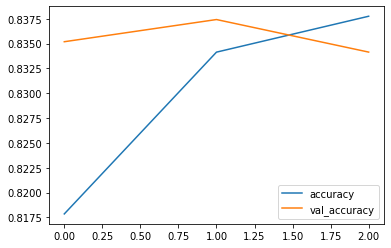

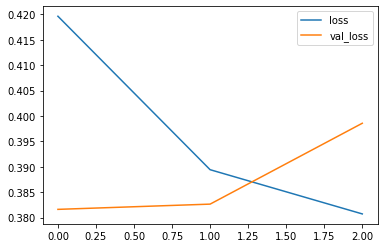

In [82]:
losse[['accuracy','val_accuracy']].plot()
losse[['loss','val_loss']].plot()

In [83]:
val_loss, val_acc = my_model.evaluate_generator(test_generation)

print('val_loss:', val_loss)
print('val_acc:', val_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


val_loss: 0.3985641896724701
val_acc: 0.8341440558433533


# model results
* After several attempts, we made a good model design
* Our model have a good acc = 85%
* over fitting is so small
* We're ready to create APIs

---
<br>

# Save &Loaded Model


In [84]:
model_json = my_model.to_json()

In [85]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)
my_model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [86]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Loaded model from disk


In [87]:
class Api_service :
    def __init__(self,img_file_path):
        self.img_file_path = img_file_path
    def prediction_function(self) :
        predict_generation = data_generation.flow_from_directory(
                                            self.img_file_path,
                                            target_size=(25,25),
                                            batch_size=10,
                                            class_mode='categorical')

        prediction = loaded_model.predict_generator(predict_generation)
        has_cancer = 'The percentage of cancer : '+ str(round(prediction[0][0]*100,2)) + "%"
        has_no_cancer='Percentage of no cancer : ' + str(round(prediction[0][1]*100,2)) + '%'
        return has_cancer,has_no_cancer 

In [88]:
prediction = Api_service("image_processing/normal/model_tst/trainig")
x,y        = prediction.prediction_function()
print(x)
print(y)

Found 18000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


The percentage of cancer : 79.59%
Percentage of no cancer : 20.41%
